<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/Machine-Hack-Fake-News-ML-Challenge/Cat-Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://machinehack-be.s3.amazonaws.com/fake_news_content_detection_weekend_hackathon_20/Participants_Data_WH20.zip
!unzip \*.zip  && rm *.zip

--2020-09-15 08:37:19--  https://machinehack-be.s3.amazonaws.com/fake_news_content_detection_weekend_hackathon_20/Participants_Data_WH20.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.62.100
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.62.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 565484 (552K) [application/zip]
Saving to: ‘Participants_Data_WH20.zip’

Participants_Data_W 100%[===================>] 552.23K   471KB/s    in 1.2s    

2020-09-15 08:37:21 (471 KB/s) - ‘Participants_Data_WH20.zip’ saved [565484/565484]

Archive:  Participants_Data_WH20.zip
   creating: Participants_Data_WH20/
  inflating: Participants_Data_WH20/sample submission.csv  
  inflating: __MACOSX/Participants_Data_WH20/._sample submission.csv  
  inflating: Participants_Data_WH20/Test.csv  
  inflating: __MACOSX/Participants_Data_WH20/._Test.csv  
  inflating: Participants_Data_WH20/Train.csv  
 

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from collections import Counter
import time
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:

train = pd.read_csv('/content/Participants_Data_WH20/Train.csv')
test = pd.read_csv('/content/Participants_Data_WH20/Test.csv')
train.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [4]:
combine = train.append(test)
combine.shape

(11507, 3)

In [5]:
combine['Text_Tag'] = combine['Text_Tag'].astype('str')
tag_group = combine.Text_Tag.apply(lambda x: x.split(','))

tags_counter = Counter([a for b in tag_group.tolist() for a in b])
tags_counter = Counter(el for el in tags_counter.elements() if tags_counter[el] >= 100)

print('Total Unique Tags:', len(tags_counter))

Total Unique Tags: 63


In [6]:
tags_counter

Counter({'abc-news-week': 100,
         'abortion': 285,
         'campaign-finance': 208,
         'candidates-biography': 736,
         'children': 216,
         'city-government': 149,
         'civil-rights': 123,
         'climate-change': 150,
         'congress': 217,
         'corporations': 159,
         'corrections-and-updates': 214,
         'crime': 505,
         'criminal-justice': 289,
         'debt': 131,
         'deficit': 240,
         'drugs': 105,
         'economy': 1296,
         'education': 822,
         'elections': 691,
         'energy': 428,
         'environment': 388,
         'ethics': 186,
         'families': 129,
         'federal-budget': 839,
         'financial-regulation': 108,
         'foreign-policy': 541,
         'gays-and-lesbians': 124,
         'government-efficiency': 171,
         'government-regulation': 197,
         'guns': 364,
         'health-care': 1256,
         'history': 455,
         'homeland-security': 114,
         'immigr

In [7]:
start_time = time.time()
loop = 1
for tag in tags_counter.keys():
    if(loop%10 == 0):
        print(loop,'Tags Processed')
    combine[tag+'_T'] = 0
    combine.loc[combine['Text_Tag'].str.contains(tag), tag+'_T'] = 1
    loop = loop + 1

seconds = time.time() - start_time
print('Time Taken:', time.strftime("%H:%M:%S",time.gmtime(seconds)))
combine = combine.drop('Text_Tag', axis=1)
combine.head(2)

10 Tags Processed
20 Tags Processed
30 Tags Processed
40 Tags Processed
50 Tags Processed
60 Tags Processed
Time Taken: 00:00:00


,Labels,Text,abortion_T,energy_T,history_T,job-accomplishments_T,foreign-policy_T,health-care_T,economy_T,jobs_T,education_T,candidates-biography_T,ethics_T,voting-record_T,elections_T,poverty_T,state-budget_T,federal-budget_T,financial-regulation_T,income_T,corporations_T,taxes_T,message-machine_T,crime_T,homeland-security_T,terrorism_T,labor_T,states_T,workers_T,climate-change_T,environment_T,government-regulation_T,corrections-and-updates_T,market-regulation_T,city-government_T,military_T,debt_T,legal-issues_T,stimulus_T,pundits_T,women_T,immigration_T,deficit_T,iraq_T,campaign-finance_T,gays-and-lesbians_T,criminal-justice_T,civil-rights_T,message-machine-2012_T,abc-news-week_T,medicare_T,transportation_T,public-health_T,polls_T,social-security_T,guns_T,state-finances_T,congress_T,public-safety_T,families_T,government-efficiency_T,drugs_T,children_T,religion_T,trade_T
0,1.0,Says the Annies List political group supports ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,When did the decline of coal start? It started...,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
def clean_summary(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>3])
    return text

stop_words = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

def remove_nonenglish(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

In [9]:
combine['clean_text'] = combine['Text'].apply(lambda x: clean_summary(x))
combine['clean_text'] = combine['clean_text'].apply(lambda x: remove_stopwords(x))
#combine['clean_text'] = combine['clean_text'].apply(lambda x: remove_nonenglish(x))

combine[['clean_text']].head(10)

,clean_text
0,says annies list political group supports thir...
1,decline coal start started natural took starte...
2,hillary clinton agrees john mccain voting give...
3,health care reform legislation likely mandate ...
4,economic turnaround started term
5,chicago bears starting quarterbacks last years...
6,dunnam lived district represents years
7,person stage worked actively last year passing...
8,however took million oregon lottery funds port...
9,says primary opponents glenn grothman leibham ...


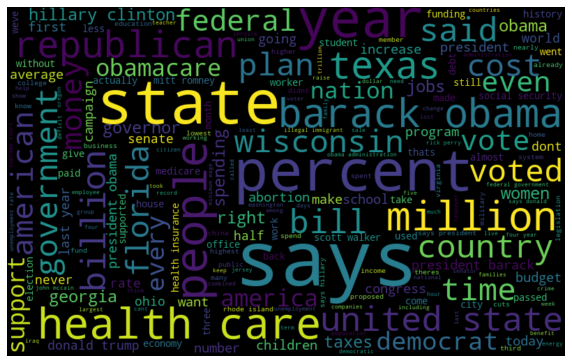

In [10]:
all_word =' '.join([text for text in combine['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

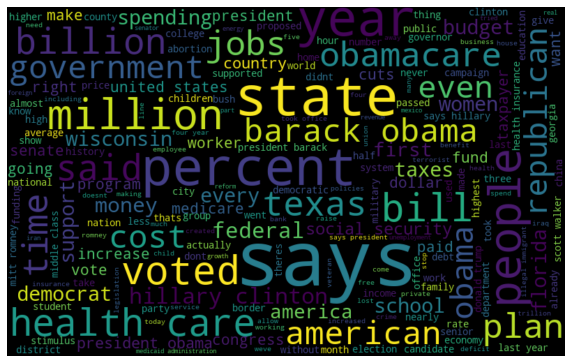

In [11]:
all_word =' '.join([text for text in combine['clean_text'][combine['Labels'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

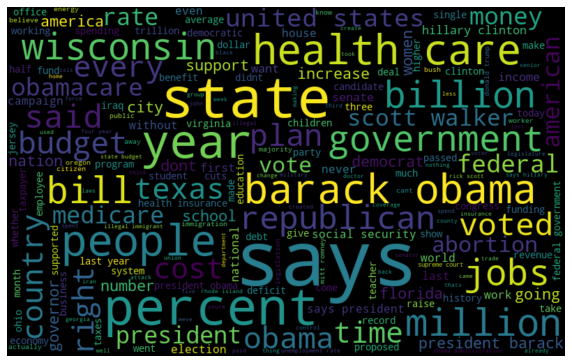

In [12]:
all_word =' '.join([text for text in combine['clean_text'][combine['Labels'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

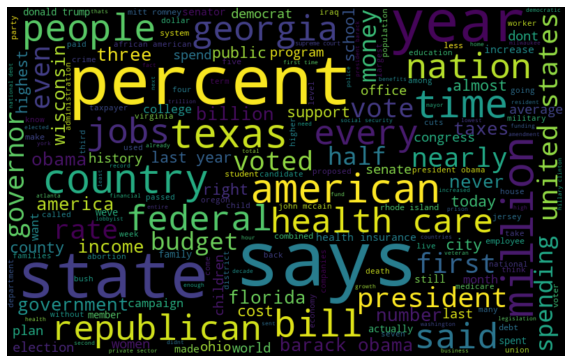

In [13]:
all_word =' '.join([text for text in combine['clean_text'][combine['Labels'] == 5]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.46, min_df=1, max_features=100)
tfidf_vectorizer.fit(combine['clean_text'].values)
x = tfidf_vectorizer.transform(combine['clean_text'].values)
combine = pd.concat([combine.reset_index(drop=True), pd.DataFrame(x.toarray(), columns=tfidf_vectorizer.get_feature_names())], axis=1)

In [16]:
combine = combine.drop(['clean_text'], axis=1).reset_index(drop=True)
combine = combine.drop('Text', axis=1)

In [17]:
combine.head(10)

,Labels,abortion_T,energy_T,history_T,job-accomplishments_T,foreign-policy_T,health-care_T,economy_T,jobs_T,education_T,candidates-biography_T,ethics_T,voting-record_T,elections_T,poverty_T,state-budget_T,federal-budget_T,financial-regulation_T,income_T,corporations_T,taxes_T,message-machine_T,crime_T,homeland-security_T,terrorism_T,labor_T,states_T,workers_T,climate-change_T,environment_T,government-regulation_T,corrections-and-updates_T,market-regulation_T,city-government_T,military_T,debt_T,legal-issues_T,stimulus_T,pundits_T,women_T,...,office,people,percent,plan,president,public,rate,republican,rick,right,romney,said,says,school,scott,security,senate,since,social,spending,state,states,taxes,texas,three,time,times,today,took,trump,unemployment,united,vote,voted,wisconsin,women,world,would,year,years
0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.466454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625468,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.394243
6,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
7,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.594652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.525196,0.000000
8,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792291,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
9,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283508,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.596823,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [18]:
combine.shape

(11507, 164)

In [19]:
X = combine[combine['Labels'].isnull()!=True].drop(['Labels'], axis=1)
y = combine[combine['Labels'].isnull()!=True]['Labels']
y = y.astype('int64')

X_test = combine[combine['Labels'].isnull()==True].drop(['Labels'], axis=1)

X.shape, y.shape, X_test.shape

((10240, 163), (10240,), (1267, 163))

In [20]:
x_train, x_val, ytrain, yval = train_test_split(X, y, 
                                                random_state=1994, 
                                                test_size=0.1, shuffle=True)

In [21]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [22]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 66.1MB 53kB/s 


In [23]:
model = CatBoostClassifier(n_estimators=1000,
                           learning_rate=0.08)

model.fit(x_train, ytrain, eval_set=[(x_train, ytrain),(x_val, yval)],
          early_stopping_rounds=200, verbose=200)

pred_prob = model.predict_proba(x_val)
print(multiclass_logloss(yval, pred_prob))

0:	learn: 1.7866516	test: 1.7866516	test1: 1.7870247	best: 1.7870247 (0)	total: 183ms	remaining: 3m 3s
200:	learn: 1.6547977	test: 1.6547977	test1: 1.7235499	best: 1.7230578 (193)	total: 21.8s	remaining: 1m 26s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 1.723057758
bestIteration = 193

Shrink model to first 194 iterations.
1.7230577575416168


In [24]:
pred_test = model.predict_proba(X_test)

In [25]:
submission = pd.DataFrame(pred_test)
submission.to_excel('CatBoost.xlsx', index=False)
submission.head()

,0,1,2,3,4,5
0,0.162076,0.224870,0.198335,0.160653,0.081489,0.172577
1,0.181678,0.241014,0.156446,0.204941,0.091867,0.124055
2,0.168845,0.209028,0.195185,0.151974,0.102483,0.172484
3,0.222875,0.243309,0.268759,0.092002,0.099630,0.073425
4,0.153642,0.262580,0.195948,0.144098,0.110457,0.133275
